In [1]:
#First we will import the important librarys

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [2]:
#load the dataset
service_request = pd.read_csv("311_Service_Requests_from_2010_to_Present.csv")

/usr/local/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (17,43,44,45,46) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


1. Understand the dataset

In [3]:
#information about the DataFrame
service_request.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115181 entries, 0 to 115180
Data columns (total 53 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Unique Key                      115181 non-null  int64  
 1   Created Date                    115181 non-null  object 
 2   Closed Date                     114457 non-null  object 
 3   Agency                          115181 non-null  object 
 4   Agency Name                     115181 non-null  object 
 5   Complaint Type                  115181 non-null  object 
 6   Descriptor                      113168 non-null  object 
 7   Location Type                   115181 non-null  object 
 8   Incident Zip                    114347 non-null  float64
 9   Incident Address                100133 non-null  object 
 10  Street Name                     100133 non-null  object 
 11  Cross Street 1                  98449 non-null   object 
 12  Cross Street 2  

In [4]:
# head function returns the topmost 5 rows in the datasets
service_request.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,32310363,12/31/2015 11:59:45 PM,01/01/2016 12:55:15 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,12/31/2015 11:59:44 PM,01/01/2016 01:26:57 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,12/31/2015 11:59:29 PM,01/01/2016 04:51:03 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"
3,32305098,12/31/2015 11:57:46 PM,01/01/2016 07:43:13 AM,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)"
4,32306529,12/31/2015 11:56:58 PM,01/01/2016 03:24:42 AM,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)"


In [5]:
#finding na values to city
service_request["City"].isna().sum()

835

In [6]:
# tail function return last 5 rows in the  datasets
service_request.tail()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
115176,31527928,09/13/2015 09:54:17 AM,09/13/2015 04:31:49 PM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11418.0,87-97 112 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.696943,-73.836155,"(40.69694283972916, -73.83615548358848)"
115177,31526105,09/13/2015 09:53:42 AM,09/13/2015 03:38:21 PM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11433.0,109-01 UNION HALL STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.694361,-73.790822,"(40.69436064917868, -73.79082163997317)"
115178,31526720,09/13/2015 09:52:40 AM,09/13/2015 10:53:38 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11385.0,2036 MENAHAN STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.708157,-73.906971,"(40.70815738577001, -73.90697098930629)"
115179,31523660,09/13/2015 09:50:53 AM,09/13/2015 02:04:23 PM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11419.0,103-33 115 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.686528,-73.828111,"(40.68652841182147, -73.82811144943031)"
115180,31524905,09/13/2015 09:49:41 AM,09/13/2015 04:31:48 PM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11415.0,84-75 126 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
#To find all columns to min , max ,std ,count ,mean and so on
service_request.describe()

,Unique Key,Incident Zip,X Coordinate (State Plane),Y Coordinate (State Plane),School or Citywide Complaint,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude
count,1.151810e+05,114347.000000,1.140750e+05,114075.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,114075.000000,114075.000000
mean,3.191222e+07,10865.894881,1.004363e+06,202336.751847,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.721994,-73.927402
std,2.310127e+05,569.805621,2.207524e+04,29417.235886,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.080740,0.079616
min,3.152314e+07,83.000000,9.133570e+05,121411.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.499673,-74.254937
25%,3.171167e+07,10312.000000,9.910830e+05,181904.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.665915,-73.975359
50%,3.191081e+07,11210.000000,1.002405e+06,200215.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.716170,-73.934484
75%,3.211834e+07,11238.000000,1.018814e+06,220029.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.770451,-73.875255
max,3.231065e+07,11697.000000,1.067154e+06,271635.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.912206,-73.700837


In [8]:
#To show the shape of the dataset
service_request.shape

(115181, 53)

In [9]:
#find the dimension 
service_request.ndim

2

1.1  Identify the shape of the dataset

In [10]:
service_request.shape

(115181, 53)

1.2 Identify variables with null values

In [11]:
service_request.isna().sum()

Unique Key                             0
Created Date                           0
Closed Date                          724
Agency                                 0
Agency Name                            0
Complaint Type                         0
Descriptor                          2013
Location Type                          0
Incident Zip                         834
Incident Address                   15048
Street Name                        15048
Cross Street 1                     16732
Cross Street 2                     16868
Intersection Street 1             100336
Intersection Street 2             100476
Address Type                         928
City                                 835
Landmark                          115083
Facility Type                        719
Status                                 0
Due Date                               0
Resolution Description                 0
Resolution Action Updated Date       712
Community Board                        1
Borough         

2. Perform basic data exploratory analysis :

2.1 Utilize missing value treatment

In [12]:
service_request= service_request.dropna(subset=['Closed Date',"City","Latitude","Longitude"],axis=0)

In [13]:
service_request= service_request.dropna(axis=1)

In [14]:
service_request= service_request.drop_duplicates()

In [15]:
service_request = service_request.reset_index()

In [16]:
service_request.isna().sum()

index                             0
Unique Key                        0
Created Date                      0
Closed Date                       0
Agency                            0
Agency Name                       0
Complaint Type                    0
Location Type                     0
City                              0
Facility Type                     0
Status                            0
Due Date                          0
Resolution Description            0
Resolution Action Updated Date    0
Community Board                   0
Borough                           0
X Coordinate (State Plane)        0
Y Coordinate (State Plane)        0
Park Facility Name                0
Park Borough                      0
School Name                       0
School Number                     0
School Region                     0
School Code                       0
School Phone Number               0
School Address                    0
School City                       0
School State                

In [17]:
service_request.head()

,index,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Location Type,City,Facility Type,...,School Code,School Phone Number,School Address,School City,School State,School Zip,School Not Found,Latitude,Longitude,Location
0,0,32310363,12/31/2015 11:59:45 PM,01/01/2016 12:55:15 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Street/Sidewalk,NEW YORK,Precinct,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,1,32309934,12/31/2015 11:59:44 PM,01/01/2016 01:26:57 AM,NYPD,New York City Police Department,Blocked Driveway,Street/Sidewalk,ASTORIA,Precinct,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,2,32309159,12/31/2015 11:59:29 PM,01/01/2016 04:51:03 AM,NYPD,New York City Police Department,Blocked Driveway,Street/Sidewalk,BRONX,Precinct,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"
3,3,32305098,12/31/2015 11:57:46 PM,01/01/2016 07:43:13 AM,NYPD,New York City Police Department,Illegal Parking,Street/Sidewalk,BRONX,Precinct,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)"
4,4,32306529,12/31/2015 11:56:58 PM,01/01/2016 03:24:42 AM,NYPD,New York City Police Department,Illegal Parking,Street/Sidewalk,ELMHURST,Precinct,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)"


In [18]:
service_request.shape

(114025, 33)

In [19]:
#After removing na values to check  
service_request.isna().sum()

index                             0
Unique Key                        0
Created Date                      0
Closed Date                       0
Agency                            0
Agency Name                       0
Complaint Type                    0
Location Type                     0
City                              0
Facility Type                     0
Status                            0
Due Date                          0
Resolution Description            0
Resolution Action Updated Date    0
Community Board                   0
Borough                           0
X Coordinate (State Plane)        0
Y Coordinate (State Plane)        0
Park Facility Name                0
Park Borough                      0
School Name                       0
School Number                     0
School Region                     0
School Code                       0
School Phone Number               0
School Address                    0
School City                       0
School State                

2.2 . Analyze the date column and remove the entries if it has an incorrect timeline

In [20]:
service_request["Created Date"]=pd.to_datetime(service_request["Created Date"])
service_request["Closed Date"] = pd.to_datetime(service_request["Closed Date"])

In [21]:
service_request.head()

,index,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Location Type,City,Facility Type,...,School Code,School Phone Number,School Address,School City,School State,School Zip,School Not Found,Latitude,Longitude,Location
0,0,32310363,2015-12-31 23:59:45,2016-01-01 00:55:15,NYPD,New York City Police Department,Noise - Street/Sidewalk,Street/Sidewalk,NEW YORK,Precinct,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,1,32309934,2015-12-31 23:59:44,2016-01-01 01:26:57,NYPD,New York City Police Department,Blocked Driveway,Street/Sidewalk,ASTORIA,Precinct,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,2,32309159,2015-12-31 23:59:29,2016-01-01 04:51:03,NYPD,New York City Police Department,Blocked Driveway,Street/Sidewalk,BRONX,Precinct,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"
3,3,32305098,2015-12-31 23:57:46,2016-01-01 07:43:13,NYPD,New York City Police Department,Illegal Parking,Street/Sidewalk,BRONX,Precinct,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)"
4,4,32306529,2015-12-31 23:56:58,2016-01-01 03:24:42,NYPD,New York City Police Department,Illegal Parking,Street/Sidewalk,ELMHURST,Precinct,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)"


In [22]:
service_request["Complaint Type"].value_counts()

Blocked Driveway             33673
Illegal Parking              30659
Noise - Commercial           14900
Noise - Street/Sidewalk      12972
Derelict Vehicle              6760
Noise - Vehicle               5425
Animal Abuse                  2849
Traffic                       1677
Homeless Encampment           1538
Vending                       1113
Noise - Park                   793
Posting Advertisement          464
Drinking                       410
Noise - House of Worship       256
Urinating in Public            188
Bike/Roller/Skate Chronic      135
Panhandling                    113
Disorderly Youth                54
Graffiti                        35
Illegal Fireworks               11
Name: Complaint Type, dtype: int64

In [23]:
service_request["City"].value_counts()

BROOKLYN               38656
NEW YORK               24245
BRONX                  14154
STATEN ISLAND           5080
ASTORIA                 2692
JAMAICA                 2667
FLUSHING                2557
RIDGEWOOD               2138
CORONA                  1764
WOODSIDE                1393
EAST ELMHURST           1146
SOUTH RICHMOND HILL     1146
ELMHURST                1116
OZONE PARK              1054
MASPETH                 1034
WOODHAVEN               1026
FRESH MEADOWS           1003
LONG ISLAND CITY        1002
SOUTH OZONE PARK         745
RICHMOND HILL            745
MIDDLE VILLAGE           734
FOREST HILLS             730
QUEENS VILLAGE           694
REGO PARK                660
JACKSON HEIGHTS          630
COLLEGE POINT            505
BAYSIDE                  476
WHITESTONE               374
FAR ROCKAWAY             361
HOLLIS                   328
HOWARD BEACH             328
SAINT ALBANS             320
KEW GARDENS              302
SPRINGFIELD GARDENS      299
SUNNYSIDE     

In [24]:
Brooklyn_City = service_request[service_request["City"] =="BROOKLYN"]

In [25]:
major_complaints = service_request.loc[:,["Complaint Type"]]

In [26]:
Complaint = service_request.loc[:,['Complaint Type','City']]

In [27]:
Complaints = service_request.loc[:,['Complaint Type','City']]

In [28]:
from sklearn.preprocessing import LabelEncoder

In [29]:
Enc=LabelEncoder()

In [30]:
service_request["Complaint Type"]= pd.DataFrame(Enc.fit_transform(service_request["Complaint Type"]))

In [31]:
service_request["Complaint Type"].value_counts()

2     33673
9     30659
10    14900
13    12972
3      6760
14     5425
0      2849
17     1677
7      1538
19     1113
12      793
16      464
5       410
11      256
18      188
1       135
15      113
4        54
6        35
8        11
Name: Complaint Type, dtype: int64

<AxesSubplot:xlabel='City', ylabel='Complaint Type'>

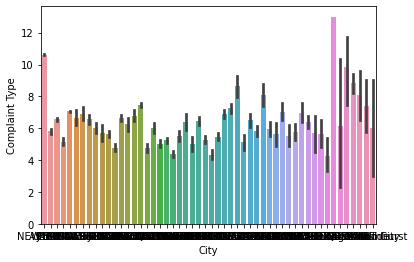

In [32]:
#2.2.1  Draw a frequency plot for city-wise complaints
sns.barplot(x=service_request["City"],y=service_request["Complaint Type"])

In [33]:
#2.2.2 Draw scatter and hexbin plots for complaint concentration across Brooklyn
Brooklyn_City["Complaint Type"].value_counts()

Blocked Driveway             12626
Illegal Parking              11580
Noise - Commercial            4663
Noise - Street/Sidewalk       3632
Derelict Vehicle              2084
Noise - Vehicle               1667
Animal Abuse                   857
Traffic                        438
Noise - Park                   323
Homeless Encampment            291
Vending                        154
Noise - House of Worship       124
Drinking                        64
Urinating in Public             48
Bike/Roller/Skate Chronic       28
Posting Advertisement           23
Disorderly Youth                21
Panhandling                     16
Graffiti                        14
Illegal Fireworks                3
Name: Complaint Type, dtype: int64

In [35]:
Brooklyn_City.head()

,index,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Location Type,City,Facility Type,...,School Code,School Phone Number,School Address,School City,School State,School Zip,School Not Found,Latitude,Longitude,Location
5,5,32306554,2015-12-31 23:56:30,2016-01-01 01:50:11,NYPD,New York City Police Department,Illegal Parking,Street/Sidewalk,BROOKLYN,Precinct,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.660823,-73.992568,"(40.66082272389114, -73.99256786342693)"
9,9,32308391,2015-12-31 23:53:58,2016-01-01 01:17:40,NYPD,New York City Police Department,Blocked Driveway,Street/Sidewalk,BROOKLYN,Precinct,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.623793,-73.999539,"(40.623793065806524, -73.99953890121567)"
13,13,32305074,2015-12-31 23:47:58,2016-01-01 08:18:47,NYPD,New York City Police Department,Illegal Parking,Street/Sidewalk,BROOKLYN,Precinct,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.687511,-73.874505,"(40.68751060232221, -73.87450451131276)"
17,17,32310273,2015-12-31 23:44:52,2016-01-01 00:36:10,NYPD,New York City Police Department,Noise - Commercial,Club/Bar/Restaurant,BROOKLYN,Precinct,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.679154,-73.983430,"(40.679154133157326, -73.98342992763081)"
18,18,32306617,2015-12-31 23:40:59,2016-01-01 02:37:28,NYPD,New York City Police Department,Noise - Commercial,Club/Bar/Restaurant,BROOKLYN,Precinct,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.616550,-73.930202,"(40.61655032892211, -73.93020153359745)"


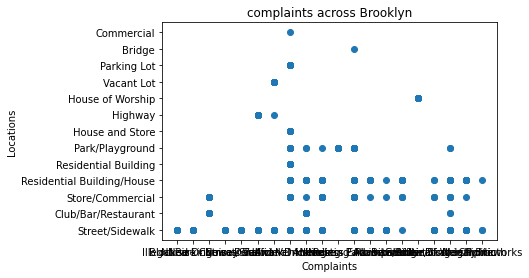

In [36]:
plt.scatter(Brooklyn_City['Complaint Type'],Brooklyn_City['Location Type'])
plt.xlabel('Complaints')
plt.ylabel('Locations')
plt.title('complaints across Brooklyn')
plt.show()

(-74.0502487900965, -73.84651545478323, 40.563187636666015, 40.74652194509859)

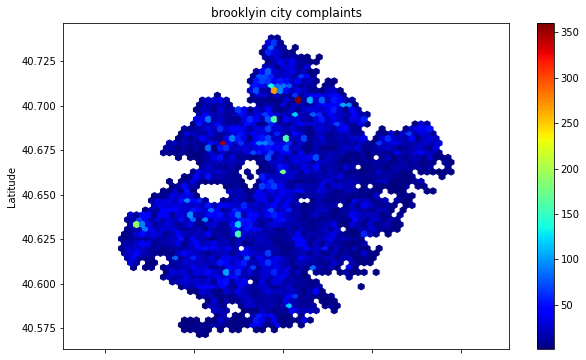

In [37]:
Brooklyn_City.plot(
    kind='hexbin', x='Longitude', y='Latitude', gridsize=55,title ="brooklyin city complaints",
    colormap='jet', mincnt=1, figsize=(10,6)).axis('equal')

3 . Find major types of complaints :

In [38]:
top_complaints=major_complaints.value_counts().head(10)

In [39]:
top_complaints

Complaint Type         
Blocked Driveway           33673
Illegal Parking            30659
Noise - Commercial         14900
Noise - Street/Sidewalk    12972
Derelict Vehicle            6760
Noise - Vehicle             5425
Animal Abuse                2849
Traffic                     1677
Homeless Encampment         1538
Vending                     1113
dtype: int64

3 . 1 to Plot a bar graph of count vs. complaint types

<AxesSubplot:title={'center':'count vs complaint types'}, xlabel='Complaint Type'>

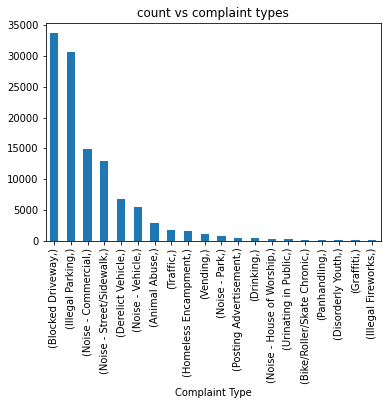

In [40]:
major_complaints.value_counts().plot(kind='bar',title='count vs complaint types')

In [41]:
# find the top 10 types of complaints
top_complaints[:10]

Complaint Type         
Blocked Driveway           33673
Illegal Parking            30659
Noise - Commercial         14900
Noise - Street/Sidewalk    12972
Derelict Vehicle            6760
Noise - Vehicle             5425
Animal Abuse                2849
Traffic                     1677
Homeless Encampment         1538
Vending                     1113
dtype: int64

In [42]:
#3.3 Display the types of complaints in each city in a separate datase
Complaint

,Complaint Type,City
0,Noise - Street/Sidewalk,NEW YORK
1,Blocked Driveway,ASTORIA
2,Blocked Driveway,BRONX
3,Illegal Parking,BRONX
4,Illegal Parking,ELMHURST
...,...,...
114020,Noise - Street/Sidewalk,ELMHURST
114021,Blocked Driveway,RICHMOND HILL
114022,Blocked Driveway,JAMAICA
114023,Blocked Driveway,RIDGEWOOD


4. visualize the major types of complaint

In [43]:
Complaint["Complaint Type"]=pd.DataFrame(Enc.fit_transform(Complaint["Complaint Type"]))

In [44]:
Complaint

,Complaint Type,City
0,13,NEW YORK
1,2,ASTORIA
2,2,BRONX
3,9,BRONX
4,9,ELMHURST
...,...,...
114020,13,ELMHURST
114021,2,RICHMOND HILL
114022,2,JAMAICA
114023,2,RIDGEWOOD


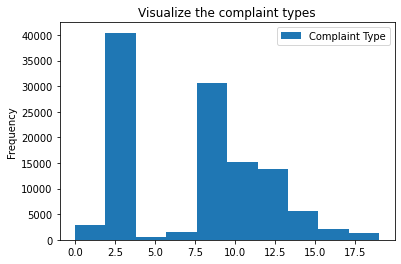

In [45]:
Complaint.plot(kind='hist',title='Visualize the complaint types')
ylabel='Complaints'

5 .Check if the average response time across various types of complaints

In [46]:
service_request['Response_Time'] = service_request['Closed Date'] - service_request['Created Date']

In [47]:
service_request.head()

,index,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Location Type,City,Facility Type,...,School Phone Number,School Address,School City,School State,School Zip,School Not Found,Latitude,Longitude,Location,Response_Time
0,0,32310363,2015-12-31 23:59:45,2016-01-01 00:55:15,NYPD,New York City Police Department,13,Street/Sidewalk,NEW YORK,Precinct,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)",0 days 00:55:30
1,1,32309934,2015-12-31 23:59:44,2016-01-01 01:26:57,NYPD,New York City Police Department,2,Street/Sidewalk,ASTORIA,Precinct,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)",0 days 01:27:13
2,2,32309159,2015-12-31 23:59:29,2016-01-01 04:51:03,NYPD,New York City Police Department,2,Street/Sidewalk,BRONX,Precinct,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)",0 days 04:51:34
3,3,32305098,2015-12-31 23:57:46,2016-01-01 07:43:13,NYPD,New York City Police Department,9,Street/Sidewalk,BRONX,Precinct,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)",0 days 07:45:27
4,4,32306529,2015-12-31 23:56:58,2016-01-01 03:24:42,NYPD,New York City Police Department,9,Street/Sidewalk,ELMHURST,Precinct,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)",0 days 03:27:44


In [48]:
Response_Time=service_request['Response_Time']
Response_Time

0        0 days 00:55:30
1        0 days 01:27:13
2        0 days 04:51:34
3        0 days 07:45:27
4        0 days 03:27:44
               ...      
114020   0 days 00:23:51
114021   0 days 06:37:32
114022   0 days 05:44:39
114023   0 days 01:00:58
114024   0 days 04:13:30
Name: Response_Time, Length: 114025, dtype: timedelta64[ns]

In [49]:
Response_Time_mean=Response_Time.mean()
Response_Time_mean

Timedelta('0 days 04:39:14.943793027')

In [50]:
citywise = pd.concat([Complaints,Response_Time],axis=1)

In [51]:
citywise

,Complaint Type,City,Response_Time
0,Noise - Street/Sidewalk,NEW YORK,0 days 00:55:30
1,Blocked Driveway,ASTORIA,0 days 01:27:13
2,Blocked Driveway,BRONX,0 days 04:51:34
3,Illegal Parking,BRONX,0 days 07:45:27
4,Illegal Parking,ELMHURST,0 days 03:27:44
...,...,...,...
114020,Noise - Street/Sidewalk,ELMHURST,0 days 00:23:51
114021,Blocked Driveway,RICHMOND HILL,0 days 06:37:32
114022,Blocked Driveway,JAMAICA,0 days 05:44:39
114023,Blocked Driveway,RIDGEWOOD,0 days 01:00:58


In [52]:
citywise.value_counts()

Complaint Type      City           Response_Time  
Illegal Parking     BROOKLYN       0 days 01:11:09    5
Blocked Driveway    BROOKLYN       0 days 00:50:02    5
Noise - Commercial  NEW YORK       0 days 00:52:40    5
Illegal Parking     BROOKLYN       0 days 02:14:13    5
                                   0 days 00:17:45    5
                                                     ..
                    STATEN ISLAND  0 days 04:07:24    1
                                   0 days 04:08:24    1
                                   0 days 04:08:26    1
                                   0 days 04:08:56    1
Animal Abuse        ARVERNE        0 days 00:46:09    1
Length: 105600, dtype: int64